## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



### Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline


## Data cleaning and preparation

In [3]:
#Reading Data
data = pd.read_csv("telecom_churn_data.csv", encoding = 'utf-8')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data.shape

(99999, 226)

In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Checking for null values

In [6]:
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

As we can observe there are columns having more than 70% missing values. Usually, we drop columns having such high missing values but there are some columns which are useful for us like the columns having recharge information so we will impute the values are restore them

In [7]:
# We will first check for the indexes of total_rech_data_ and date_of_last_rech_data_ 
# if they are equal we can impute the values as 0 as there was no recharge for that index
total_6 = data['total_rech_data_6'].isnull()
last_6 = data['date_of_last_rech_data_6'].isnull()

#checking if indexes are equal
if total_6.equals(last_6):
    print('Index for month 6 are equal')

total_7 = data['total_rech_data_7'].isnull()
last_7 = data['date_of_last_rech_data_7'].isnull()

if total_7.equals(last_7):
    print('Index for month 7 are equal')
    
total_8 = data['total_rech_data_8'].isnull()
last_8 = data['date_of_last_rech_data_8'].isnull()

if total_8.equals(last_8):
    print('Index for month 8 are equal')
    
total_9 = data['total_rech_data_9'].isnull()
last_9 = data['date_of_last_rech_data_9'].isnull()

if total_9.equals(last_9):
    print('Index for month 9 are equal')

Index for month 6 are equal
Index for month 7 are equal
Index for month 8 are equal
Index for month 9 are equal


In [8]:
# As the indexes are equal we can impute the nulls as 0 also we will impute for column av_rech_amt_data_
data['total_rech_data_6'].fillna(0, inplace=True)
data['total_rech_data_7'].fillna(0, inplace=True)
data['total_rech_data_8'].fillna(0, inplace=True)
data['total_rech_data_9'].fillna(0, inplace=True)

data['av_rech_amt_data_6'].fillna(0, inplace=True)
data['av_rech_amt_data_7'].fillna(0, inplace=True)
data['av_rech_amt_data_8'].fillna(0, inplace=True)
data['av_rech_amt_data_9'].fillna(0, inplace=True)

data['max_rech_data_6'].fillna(0, inplace=True)
data['max_rech_data_7'].fillna(0, inplace=True)
data['max_rech_data_8'].fillna(0, inplace=True)
data['max_rech_data_9'].fillna(0, inplace=True)

In [9]:
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [10]:
# Now we will check for columns having unique values
uniq_cols=[]
for i in data.columns:
    if data[i].nunique() == 1:
        uniq_cols.append(i)
        print(i)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [11]:
# Dropping columns having values 1
data.drop(uniq_cols, axis=1, inplace = True)

In [12]:
data.shape

(99999, 210)

In [13]:
data.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

In [14]:
# As we can see above columns of date time are in object format so we will convert them to datetime
datetime_cols= data.select_dtypes(include=['object'])

for i in datetime_cols.columns:
    data[i] = pd.to_datetime(data[i])
    print(i)


date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [15]:
# We have some columns like count_rech_2g_*, count_rech_3g_* having nulls 
# but can be represented by single column total_rech_data_*
# So we will delete the unrequired columns

count_cols = ['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9']


In [16]:
data.drop(count_cols, axis=1, inplace=True)

In [17]:
data.shape

(99999, 202)

In [18]:
# Other columns like fb_user_* and night_pck_user_* have missing values above 70%. 
# Also it does not seem useful for analysis so we can drop them

data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],axis=1, inplace=True)

In [19]:
data.shape

(99999, 194)

In [20]:
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou

In [21]:
# As date_of_last_rech_data_* and date_of_last_rech_* can be represented by total_rech_data_* we can drop them due to high missing values

data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=1, inplace=True)

In [22]:
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1, inplace=True)

In [23]:
data.shape

(99999, 186)

In [24]:
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8    

In [25]:
# For the remaining columns arpu_2g_* and arpu_3g_* let's check the correlation between them

print(data[['arpu_2g_6','arpu_3g_6']].corr())
print(data[['arpu_2g_7','arpu_3g_7']].corr())
print(data[['arpu_2g_8','arpu_3g_8']].corr())
print(data[['arpu_2g_9','arpu_3g_9']].corr())


           arpu_2g_6  arpu_3g_6
arpu_2g_6   1.000000   0.932232
arpu_3g_6   0.932232   1.000000
           arpu_2g_7  arpu_3g_7
arpu_2g_7   1.000000   0.930366
arpu_3g_7   0.930366   1.000000
           arpu_2g_8  arpu_3g_8
arpu_2g_8   1.000000   0.924925
arpu_3g_8   0.924925   1.000000
           arpu_2g_9  arpu_3g_9
arpu_2g_9   1.000000   0.852253
arpu_3g_9   0.852253   1.000000


In [26]:
data.drop(['arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_8','arpu_3g_8','arpu_2g_9','arpu_3g_9'], axis=1, inplace=True)

In [27]:
data.shape

(99999, 178)

In [28]:
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number         0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_6      3.94
loc_og_t2c_mou_7      3.86
loc_og_t2c_mou_8      5.38
loc_og_t2c_mou_9      7.75
l

## Now that we have taken care of missing values we will filter high value customers by creating a new feature variable

In [29]:
# We will create a new column for total_data_rech_amt_* 

data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_data_rech_amt_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']

In [30]:
# Now we will filter the high value customers by taking 70th Percentile 

av_rech_amt_6_7 = data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
amt_70th_tile = np.percentile(av_rech_amt_6_7, 70)
print(" Average recharge amount in the first two months -", amt_70th_tile)

 Average recharge amount in the first two months - 239.0


In [31]:
# Taking the customer data with 70th percentile
data = data[av_rech_amt_6_7 >= amt_70th_tile]
data.shape

(30001, 182)

#### As mentioned we have now around 29 - 30k customers

## Now we will Tag churners and remove attributes of the churn phase

In [32]:
churn_cols = data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
data['churn'] = data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) and (x.vol_2g_mb_9 == 0) and (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [33]:
data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,

#### Now we can drop the columns for last month corresponding to the churn phase

In [34]:
cols_9 = [cols for cols in data.columns if '_9' in cols]
cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_data_rech_amt_9']

In [35]:
data.drop(cols_9, axis=1, inplace=True)

In [36]:
data.shape

(30001, 139)

In [37]:
# we will also drop the below columns as we dervied values from them
data.drop(['av_rech_amt_data_6','total_rech_data_6','total_rech_amt_6','av_rech_amt_data_7','total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [38]:
# Now we will check for variance in the data
cols_0_variance = data.var() == 0
col_name_0_variance = cols_0_variance[cols_0_variance == 1].index
col_name_0_variance


Index([], dtype='object')

In [39]:
# Dropping columns will 0 variance
data.drop(col_name_0_variance, axis=1, inplace = True)

In [40]:
data.shape

(30001, 133)

In [41]:
# Now we will check for coorelation in the data
cols_corr = data.corr().stack()
cols_corr[(cols_corr > 0.80) | (cols_corr < -0.80)].sort_values(ascending=False)

mobile_number          mobile_number            1.000000
total_ic_mou_6         total_ic_mou_6           1.000000
std_ic_t2m_mou_7       std_ic_t2m_mou_7         1.000000
std_ic_t2m_mou_8       std_ic_t2m_mou_8         1.000000
std_ic_t2f_mou_6       std_ic_t2f_mou_6         1.000000
std_ic_t2f_mou_7       std_ic_t2f_mou_7         1.000000
std_ic_t2f_mou_8       std_ic_t2f_mou_8         1.000000
std_ic_mou_6           std_ic_mou_6             1.000000
std_ic_mou_7           std_ic_mou_7             1.000000
std_ic_mou_8           std_ic_mou_8             1.000000
total_ic_mou_7         total_ic_mou_7           1.000000
ic_others_8            ic_others_8              1.000000
total_ic_mou_8         total_ic_mou_8           1.000000
spl_ic_mou_6           spl_ic_mou_6             1.000000
spl_ic_mou_7           spl_ic_mou_7             1.000000
spl_ic_mou_8           spl_ic_mou_8             1.000000
isd_ic_mou_6           isd_ic_mou_6             1.000000
isd_ic_mou_7           isd_ic_m

In [42]:
# Dropping highly correlated columns
cols_corr_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6', 'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2m_mou_8',]
data.drop(cols_corr_drop, axis=1, inplace=True)

In [43]:
data.shape

(30001, 121)

## EDA - Categorical data analysis

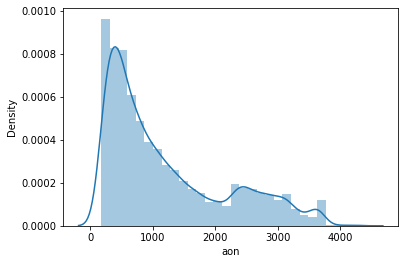

In [44]:
sns.distplot(data['aon'],bins=30)
plt.show()

In [45]:
# we will creating a new column tenure for better relation to churn
data['tenure'] = (data['aon']/30).round(0)
data.drop('aon',axis=1, inplace=True)

In [46]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data['tenure_rang'] = pd.cut(data['tenure'], tenure_range, labels=tenure_label)
data['tenure_rang'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_rang, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

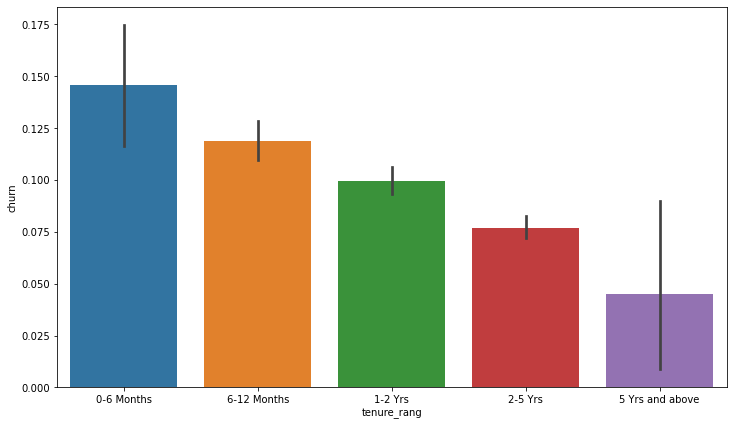

In [47]:
# now plotting a graph for tenure_rang
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_rang',y='churn', data=data)
plt.show()

#### From the above plot we can see that maximum churn happens between 0-6 months, and it gradually decreases


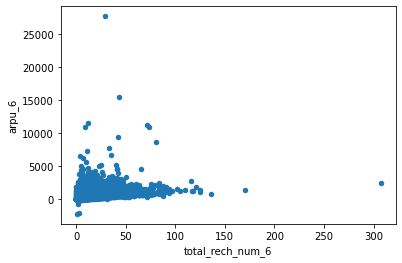

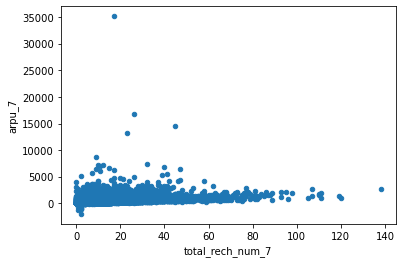

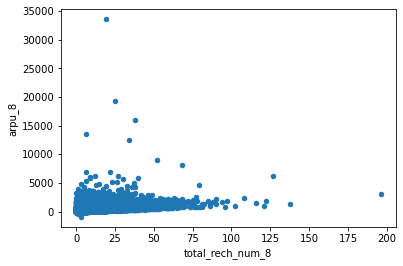

In [48]:
# now let's graph plot between total recharge and avg revenue
data[['total_rech_num_6', 'arpu_6']].plot.scatter(x = 'total_rech_num_6', y='arpu_6')
data[['total_rech_num_7', 'arpu_7']].plot.scatter(x = 'total_rech_num_7', y='arpu_7')
data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

In [49]:
# now we will creating boxplot for all months
def box_plot(attribute):
    plt.figure(figsize=(15,20))
    plt.subplot(2,3,1)
    sns.boxplot(data=data, y=attribute+"_6",x="churn",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=data, y=attribute+"_7",x="churn",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=data, y=attribute+"_8",x="churn",showfliers=False)
    plt.show()

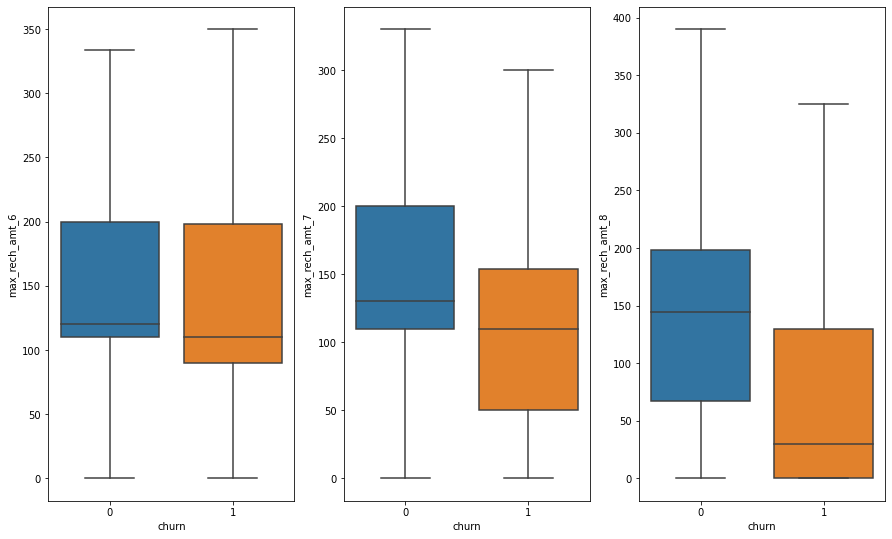

In [50]:
# Plotting the total_rech_amt
box_plot('max_rech_amt')

## We can see there is a drop in max_rech amount as the customers churn

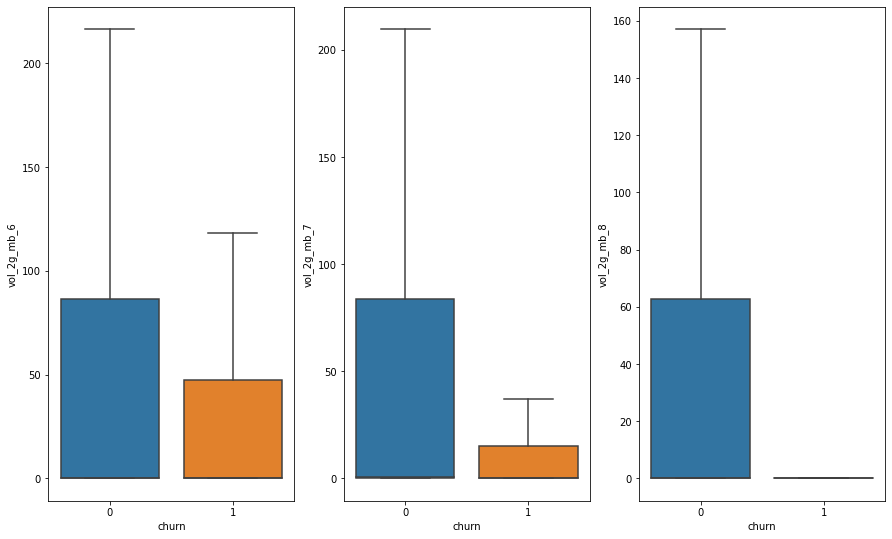

In [51]:
box_plot('vol_2g_mb')

#### As we can observe that usage of 2g data actively drops

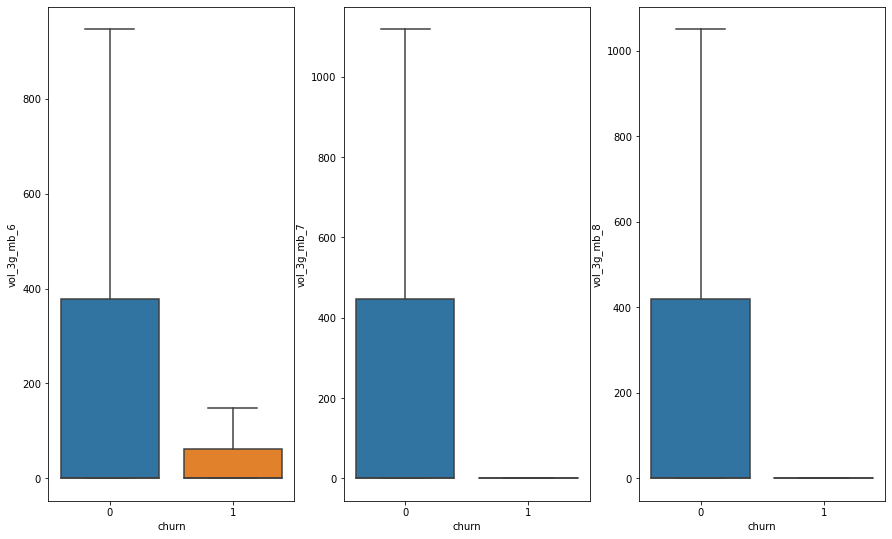

In [52]:
box_plot('vol_3g_mb')

#### A similar trend is found in 3g data also which might conclude that areas having low service customers tend to churn

In [53]:
# Let us get more insight using bar plot we have created a function for returning a bar plot for the cols
def bar_plot(data,cols):
    data_0 = data[data.churn==0].filter(cols)
    data_1 = data[data.churn==1].filter(cols)

    mean_0 = pd.DataFrame([data_0.mean()],index={'Non-churn'})
    mean_1 = pd.DataFrame([data_1.mean()],index={'Churn'})

    concat = [mean_0, mean_1]
    mean = pd.concat(concat)

    mean.T.plot.bar(figsize=(15,6))
    plt.show()
    
    return mean

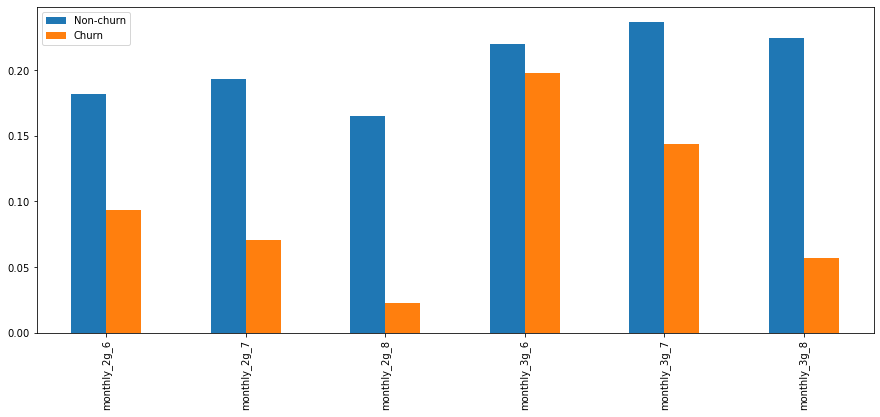

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non-churn,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churn,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [54]:
monthly_data = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']
bar_plot(data, monthly_data)

### Here also we can notice a gradual drop in monthly subscription

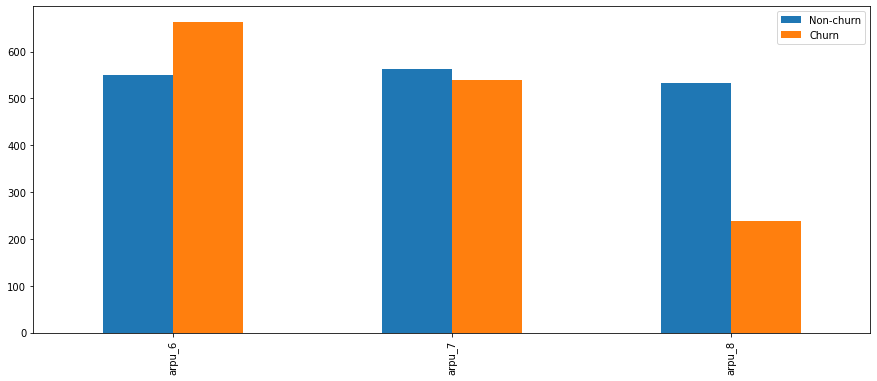

,arpu_6,arpu_7,arpu_8
Non-churn,549.220390,562.608191,532.635710
Churn,663.158246,540.165968,237.200793


In [55]:
arpu_cols = data.columns[data.columns.str.contains('arpu_')]
bar_plot(data, arpu_cols)

In [56]:
#Because the formed column 'tenure_rang' won't be needed in our model building, we remove it
data.drop('tenure_rang', axis = 1, inplace = True)

In [57]:
#Defining a function to clean any remaining NaN or infinite values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [58]:
clean_dataset(data)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn,tenure
7,7.000702e+09,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1.0,27.0
8,7.001525e+09,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0.0,10.0
21,7.002124e+09,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,50.0,50.0,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,24.0
23,7.000887e+09,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,2.36,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.10,0

### Again we can observe a decrease in arpu columns in the last month

# Model Building

### Perform train-test split

In [59]:
#The feature variable is assigned to X
X = data.drop(['churn','mobile_number'],axis=1)

#The response variable is assigned to Y
y = data['churn']

In [60]:
#Scaling the dataframe with fit_transform
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)

In [61]:
#Splitting the data into testing and training set with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scale_final,y, train_size=0.8,test_size=0.2,random_state=57)

## PCA : Principal Component Analysis

* The principal component estimation shouldn't include the entire model. 
* We would be using training data for PCA. We can use them on test data later.

In [62]:
#Checking the dimension of our training dataset
X_train.shape

(22803, 119)

In [63]:
#Performing PCA 
pca = PCA(random_state=55)

In [64]:
#Fit the training data
pca.fit(X_train)

PCA(random_state=55)

In [65]:
#Checking the components of PCA after fitting
pca.components_

array([[ 1.59223873e-01,  1.59493176e-01,  1.52386444e-01, ...,
        -8.78931255e-02, -7.30770700e-02,  2.74511923e-02],
       [ 5.81249717e-02,  5.91224982e-02,  7.92537756e-02, ...,
         7.97839082e-02,  8.10743236e-02,  8.28869418e-02],
       [ 1.45073801e-01,  1.71067612e-01,  1.69109124e-01, ...,
         1.11561951e-01,  1.20814652e-01, -6.94517099e-02],
       ...,
       [ 8.39747695e-07, -1.22228809e-08, -5.36469559e-07, ...,
        -4.27475765e-08,  8.49221720e-08, -2.71981413e-07],
       [-2.19664327e-07,  8.79467622e-08,  4.27314059e-08, ...,
        -1.49029496e-08,  4.05678754e-08,  4.34458737e-08],
       [ 9.64407676e-07,  8.90798906e-08, -5.84150968e-07, ...,
        -4.13536490e-08, -1.37202453e-07, -3.43799886e-07]])

In [66]:
#To find cumulative variance, explained variance ratio would be necessary
pca.explained_variance_ratio_

array([1.01268087e-01, 8.55716637e-02, 5.95407632e-02, 4.72000151e-02,
       4.21243419e-02, 3.23768070e-02, 2.93721277e-02, 2.85472548e-02,
       2.63445834e-02, 2.53648753e-02, 2.40855451e-02, 2.28789226e-02,
       2.16046517e-02, 1.87923891e-02, 1.79577044e-02, 1.68898846e-02,
       1.68352043e-02, 1.58820138e-02, 1.47007236e-02, 1.41806482e-02,
       1.35615149e-02, 1.15946823e-02, 1.13802362e-02, 1.11078751e-02,
       1.06844632e-02, 9.66829871e-03, 9.50374178e-03, 9.35380697e-03,
       8.97943014e-03, 8.45201532e-03, 8.35429275e-03, 8.13230257e-03,
       8.03630309e-03, 7.97020178e-03, 7.30032877e-03, 7.24031413e-03,
       7.06033263e-03, 7.01043672e-03, 6.49818904e-03, 6.36077586e-03,
       6.24036493e-03, 5.63842907e-03, 5.52579376e-03, 5.45559995e-03,
       5.14170579e-03, 4.93381597e-03, 4.75066451e-03, 4.63746974e-03,
       4.41344106e-03, 4.16222007e-03, 3.85996666e-03, 3.76092825e-03,
       3.68470224e-03, 3.62234257e-03, 3.48800849e-03, 3.45312459e-03,
      

Cumulative variance is required to deduce how many components can be used in our model. We need to choose an optimum number of features that can explain most of the variance.

In [67]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

#### Making a scree plot for the explained variance

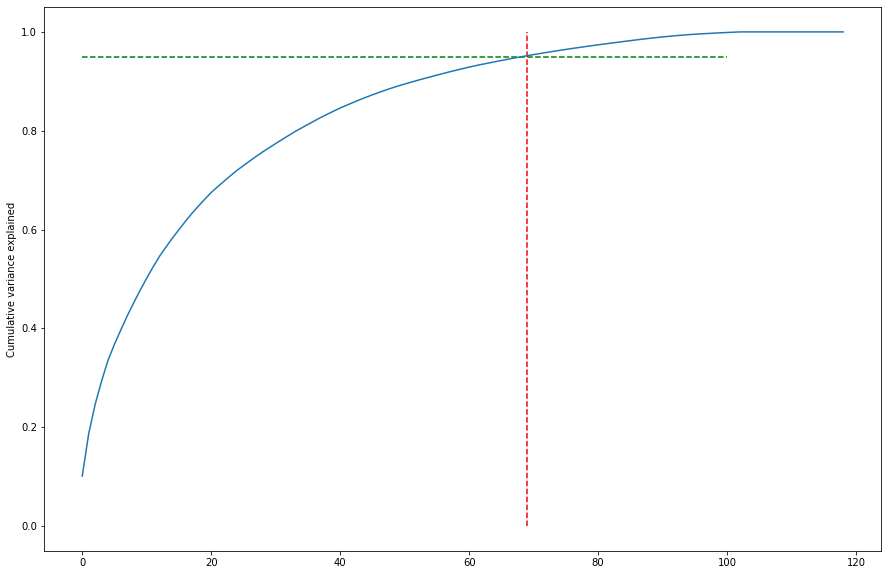

In [68]:
fig = plt.figure(figsize=[15,10])
#By backtracking, we see that x=69 is the point where 95% variance is explained
plt.vlines(x=69, ymax=1, ymin=0, colors="r", linestyles="--")
#We want to find out the number of components that can explain 95% of variance
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(cum_var)
plt.ylabel("Cumulative variance explained")
plt.show()

From the above analysis, we see that roughly 69 components are able to explain 95% of the variance in the dataset.

In [69]:
#Taking 69 components for analysis
pca_final = IncrementalPCA(n_components=69)

In [70]:
#Scaling the dataset
data_train_pca = pca_final.fit_transform(X_train)

In [71]:
data_train_pca.shape

(22803, 69)

Now, we apply the fit_transform to the test dataset

In [72]:
data_test_pca = pca_final.transform(X_test)
data_test_pca.shape

(5701, 69)

Apply Logistic Regression to the dataset hence obtained after PCA

In [73]:
pca_learn = LogisticRegression()

In [74]:
model_pca = pca_learn.fit(data_train_pca, y_train)

In [75]:
pred_probs_test = model_pca.predict_proba(data_test_pca)

In [76]:
data_y_pred = model_pca.predict(data_test_pca)

In [77]:
#Finding out the classification report
print("Classification report\n\n",classification_report(y_test, data_y_pred))

Classification report

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5391
           1       0.51      0.11      0.18       310

    accuracy                           0.95      5701
   macro avg       0.73      0.55      0.58      5701
weighted avg       0.93      0.95      0.93      5701



In [78]:
#Finding out the confusion matrix
print("Confusion matrix\n",confusion_matrix(y_test, data_y_pred))

Confusion matrix
 [[5357   34]
 [ 275   35]]


In [79]:
#Finding out the accuracy score
print("Accuracy score=",accuracy_score(y_test, data_y_pred))

Accuracy score= 0.9457989826346255


* __Hence, by using Logistic Regression with PCA, the accuracy score for our model turns out to be 94.6%__

## Random Forest

* We would try to fit the random forest models on default hyperparameters first.

In [80]:
#Checking the dimensions of default training data
X_train.shape

(22803, 119)

Default Hyperparameters

In [81]:
#Assigning the Random Forest Classfier function with default variables
rfc = RandomForestClassifier()

In [82]:
#Fit the model into training dataset
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
#Predict the results using training dataset
predictions = rfc.predict(X_test)

In [84]:
#Finding out the classification report
print("Classification Report\n\n", classification_report(y_test,predictions))

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5391
           1       0.65      0.26      0.38       310

    accuracy                           0.95      5701
   macro avg       0.80      0.63      0.68      5701
weighted avg       0.94      0.95      0.94      5701



In [85]:
#Finding the confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test,predictions))

Confusion Matrix
 [[5347   44]
 [ 228   82]]


In [86]:
#Calculating the accuracy of our model
print("Accuracy=",accuracy_score(y_test,predictions))

Accuracy= 0.9522890720926154


* __Hence, by using Random Forest Classifier as our model, the accuracy increases to 95.14%__

__Let's try some Hyperparameter Tuning now on the model to see whether it is working better.__

In [87]:
#We take 6 folds for k-folds CV
n_folds = 6

#We define a function that would tune different parameters
def parameter_tuning(param) :
    rfc = RandomForestClassifier()
    rfc = GridSearchCV(rfc, param, cv=n_folds, scoring="accuracy", return_train_score=True)
    rfc.fit(X_train, y_train)
    return rfc

#We define a graph that would be shown after tuning every parameter
def tuned_param(modelParam, model, results):
    plt.figure()
    plt.plot(results[modelParam], results["mean_train_score"], label="training accuracy")
    plt.plot(results[modelParam], results["mean_test_score"], label="test accuracy")
    plt.xlabel(modelParam)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

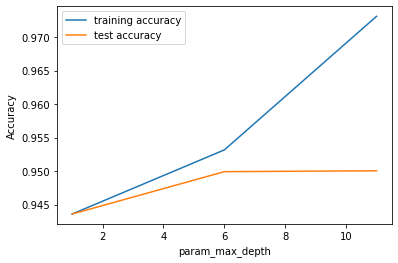

In [88]:
#The max depth needs to be tuned now
params = {'max_depth': range(1, 15, 5)}
rfc = parameter_tuning(params)
results = rfc.cv_results_
tuned_param("param_max_depth", rfc, results)

On increasing the maximum parameter depth, we notice that the test accuracy becomes almost constant after growing for a certain limit along with training accuracy. This is an indication of overfit that the ensemble tries to do as we increase the param_max_depth. Hence, overfitting can be controlled by optimizing the depth of the tree. As from the graph, at a maximum parameter depth of 6, the model reaches its optimum accuracy. We would proceed with this information.

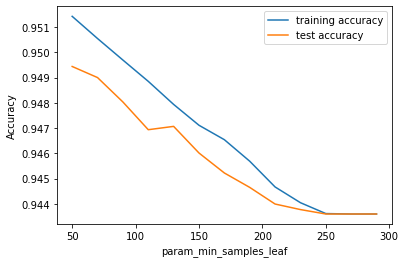

In [89]:
#To control the tree's depth, the min_leaf must be optimized
params = {'min_samples_leaf': range(50, 300, 20)}
rfc = parameter_tuning(params)
res = rfc.cv_results_
tuned_param("param_min_samples_leaf", rfc, res)

We can see that the model starts to overfit as value is decrease the value of min_samples_leaf. For grid search, 250 seems to be a legible choice to start with.

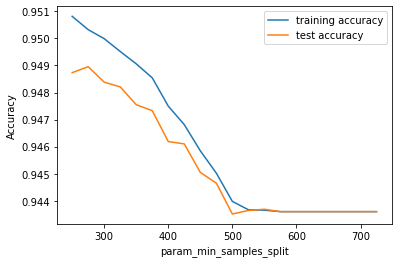

In [90]:
#Optimizing the minimum samples in each node
params = {'min_samples_split': range(250, 750, 25)}
rfc = parameter_tuning(params)
res = rfc.cv_results_
tuned_param("param_min_samples_split", rfc, res)

As we can see, the training accuracy peaks at around 95.1% and the test accuracy peaks at 94.9%. Hence, we would take 1500 estimators.

In [91]:
#Using the graphs for tuning, we would again apply the RFC model
X_train, X_test, y_train, y_test = train_test_split(X_scale_final,y, train_size=0.8,test_size=0.2,random_state=84)

model_f = RandomForestClassifier(bootstrap=True, max_depth=6, min_samples_leaf=50, min_samples_split=250, n_estimators=1500,oob_score = True, n_jobs = -1,random_state =10,max_features = 25, max_leaf_nodes = 30)
model_f.fit(X_train, y_train)

#Predicting the outcomes
pred_test = model_f.predict(X_test)

In [92]:
#Finding out the confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, data_y_pred))

Confusion Matrix
 [[5326   61]
 [ 306    8]]


In [93]:
#Finding out the classification report
print("Classification Report\n\n",classification_report(y_test, data_y_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5387
           1       0.12      0.03      0.04       314

    accuracy                           0.94      5701
   macro avg       0.53      0.51      0.50      5701
weighted avg       0.90      0.94      0.92      5701



In [94]:
#The estimated accuracy after hyperparameter tuning
print("Accuracy score = ",accuracy_score(y_test, data_y_pred))

Accuracy score =  0.9356253288896684


<AxesSubplot:>

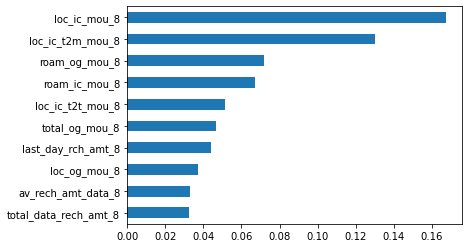

In [95]:
#Plotting the weights of feature against a graph to identify the parameters with maximum priority
importance = model_f.feature_importances_
weights = pd.Series(importance,
                 index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [96]:
#Now we would add a column to aggregate the tenure range into one column
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data['tenure_rang'] = pd.cut(data['tenure'], tenure_range, labels=tenure_label)
data['tenure_rang'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_rang, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

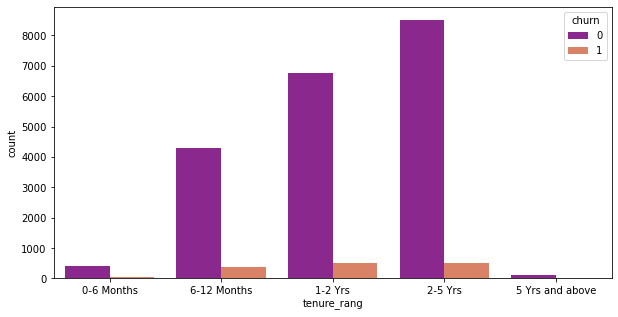

In [97]:
#A graph to find the customers added to customers churned
plt.figure(figsize=(10,5))
sns.countplot(x = 'tenure_rang', hue = 'churn',data = data,palette=("plasma"))
plt.show()

In [98]:
#Listing out the major 3 components in the PCA
col = list(X_scale_final.columns)
data_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
data_pca.head(15)

,PC1,PC2,PC3,Feature
0,0.159224,0.058125,0.145074,arpu_6
1,0.159493,0.059122,0.171068,arpu_7
2,0.152386,0.079254,0.169109,arpu_8
3,0.136242,-0.074653,0.077631,onnet_mou_6
4,0.144515,-0.081053,0.094781,onnet_mou_7
5,0.144475,-0.066444,0.098194,onnet_mou_8
6,0.187015,-0.030129,0.082091,offnet_mou_6
7,0.190337,-0.035939,0.100870,offnet_mou_7
8,0.180673,-0.014085,0.095797,offnet_mou_8
9,0.021465,0.003194,0.047200,roam_ic_mou_6


## Business Insights

Now we list out the insights gained from performing rigorous analysis of the dataset.

* For the first 6 months of new customer subscription, the churn rate is maximum. Hence, customers should be provided with various schemes initially so that they become bona fide subscribers. As the churning rate gradually drops by time.

* For every high value customer, the probability of them churning is less, but at the same time, the trend shows that in the past 6 months, no new high-valued customer has subscribed, meaning that the company should focus on acquiring high-value customers.

* Roaming rates affect the churning rate to some extent. Hence, it is necessary for the telecom company to work with roaming rates so that there can be better offers for customer using the service.

* The churning behavior is strongly indicated by the incoming and outgoing calls on roaming network on the 8th month. Hence special notice should be taken here so that churning rate can be reduced.

